<a href="https://colab.research.google.com/github/Nada-Naveesh/Deep_Learning/blob/main/3fnn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#Import the required modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#Import the dataset
num_words = 10000
(x_train, y_train), (x_test, y_test)=reuters.load_data(num_words=num_words)

In [29]:
#Multi-hot-encoding of words
def vectorize(seqs, dim=num_words):
    res=np.zeros((len(seqs), dim), dtype="float32")
    for i, seq in enumerate(seqs):
      res[i, seq] = 1.0
    return res
x_train = vectorize(x_train)
x_test = vectorize(x_test)

In [30]:
#One-hot-encoding of words
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

In [31]:
#Model the network
model = keras.Sequential([
layers.Dense(64, activation='relu', input_shape=(num_words,)),
layers.Dense(64, activation='relu'),
layers.Dense(46, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
#Train and evaluate the model
history=model.fit(x_train, y_train_oh, epochs=10, batch_size=512, validation_split=0.15)
test_loss, test_acc=model.evaluate(x_test, y_test_oh)
print(f"Test accuracy:{test_acc}")
print(f"Test loss:{test_loss}")

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.3632 - loss: 3.5438 - val_accuracy: 0.5564 - val_loss: 2.4856
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6045 - loss: 2.1081 - val_accuracy: 0.6832 - val_loss: 1.6340
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.7187 - loss: 1.3718 - val_accuracy: 0.7181 - val_loss: 1.3392
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7763 - loss: 1.0572 - val_accuracy: 0.7389 - val_loss: 1.1944
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8299 - loss: 0.8230 - val_accuracy: 0.7671 - val_loss: 1.0984
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8665 - loss: 0.6464 - val_accuracy: 0.7767 - val_loss: 1.0411
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8833 - loss: 0.5302 - val_accuracy: 0.7871 - val_loss: 0.9929
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9157 - loss: 0.4067 - val_accuracy: 0.7938 - 

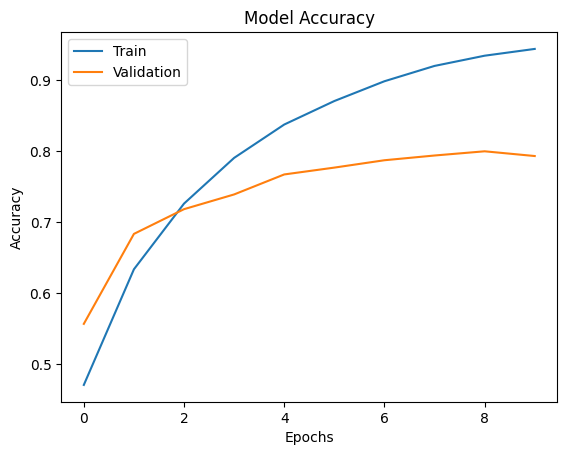

In [34]:
#Plot the graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('Model Accuracy.jpg')
plt.show()